In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20180410

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)
fontsize = 40

import os
import numpy as np
import scipy as sp
import pandas as pd
import re
from scanf import scanf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy.interpolate import interp1d
from IPython.display import display, HTML
from scipy import interpolate
from scipy import integrate

PWD = os.getcwd()
np.set_printoptions(linewidth=130, precision=5)

Populating the interactive namespace from numpy and matplotlib


[-0.28755 -0.27814 -0.27089 -0.26594 -0.26336 -0.26319 -0.26543 -0.27005 -0.27697 -0.28609 -0.29725 -0.3103  -0.32501 -0.34116
 -0.35849 -0.37673 -0.39559 -0.41478 -0.43399 -0.45291 -0.47126 -0.48874 -0.50507 -0.52    -0.5333  -0.54474 -0.55416 -0.5614
 -0.56635 -0.56893 -0.5691  -0.56686 -0.56225 -0.55532 -0.54621 -0.53504 -0.522   -0.50729 -0.49114 -0.47381 -0.45556 -0.4367
 -0.41752 -0.39831 -0.37938 -0.36103 -0.34356 -0.32722 -0.31229 -0.299  ]
[[-0.28755 -0.27814 -0.27089 -0.26594 -0.26336 -0.26319 -0.26543 -0.27005 -0.27697 -0.28609 -0.29725 -0.3103  -0.32501 -0.34116
  -0.35849 -0.37673 -0.39559 -0.41478 -0.43399 -0.45291 -0.47126 -0.48874 -0.50507 -0.52    -0.5333  -0.54474 -0.55416 -0.5614
  -0.56635 -0.56893 -0.5691  -0.56686 -0.56225 -0.55532 -0.54621 -0.53504 -0.522   -0.50729 -0.49114 -0.47381 -0.45556 -0.4367
  -0.41752 -0.39831 -0.37938 -0.36103 -0.34356 -0.32722 -0.31229 -0.299  ]
 [ 0.96815  0.94489  0.92107  0.89707  0.87326  0.85002  0.82771  0.80669  0.78728  0.7698

True

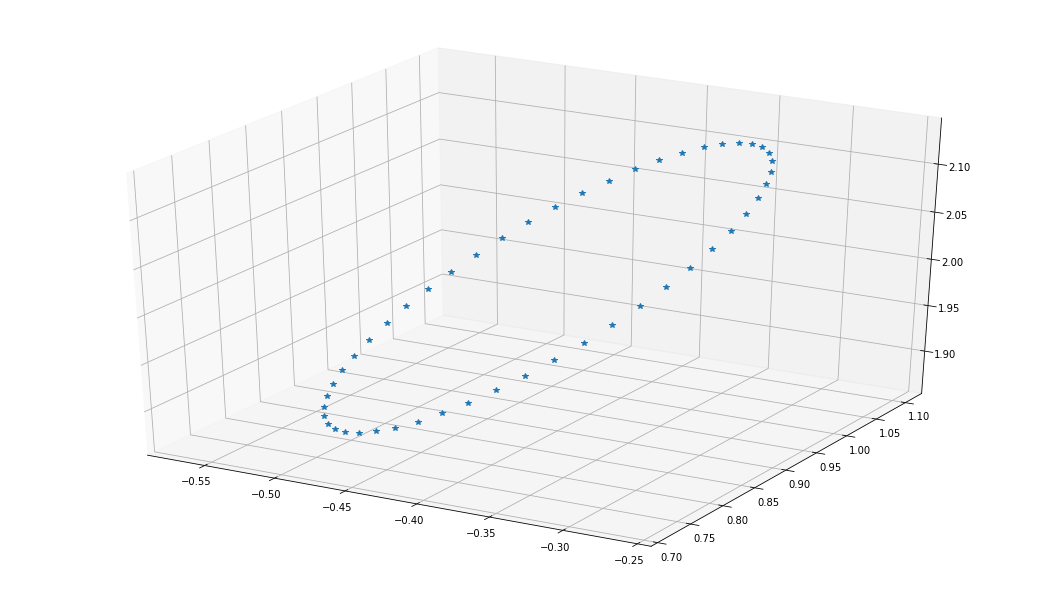

In [8]:
def create_n(n, maxtheta):
    x1 = lambda theta: np.cos(theta) * (r - rho * np.sin(phi)) + (ph * rho * np.cos(phi) * np.sin(
            theta)) / np.sqrt(ph ** 2 + 4 * np.pi ** 2 * r ** 2)
    x2 = lambda theta: - (ph * rho * np.cos(phi) * np.cos(theta)) / np.sqrt(
            ph ** 2 + 4 * np.pi ** 2 * r ** 2) + (r - rho * np.sin(phi)) * np.sin(theta)
    x3 = lambda theta: (ph * theta) / (2. * np.pi) + (2 * np.pi * r * rho * np.cos(phi)) / np.sqrt(
            ph ** 2 + 4 * np.pi ** 2 * r ** 2)

    r = 1
    rho = 0.2
    ph = 1 * (2 * np.pi)
    phi = np.linspace(0, 2 * np.pi, n, endpoint=False)
    nodes = np.vstack((x1(maxtheta), x2(maxtheta), x3(maxtheta)))
    print(x1(maxtheta))
    print(nodes)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.patch.set_facecolor('white')
    ax.plot(*nodes, '*')
    return True

create_n(50, 2)
    

1.000000e+00 0.266350415204 4.85248234625e-14
1.000000e+01 1.21645800368 1.62544378036e-08
1.000000e+02 -0.0834590326954 1.20035893542e-08
1.000000e+03 -0.126162243704 1.40957789363e-08
1.000000e+04 -0.126600739454 1.46766989199e-08
1.000000e+05 -0.126605139119 1.48186844359e-08


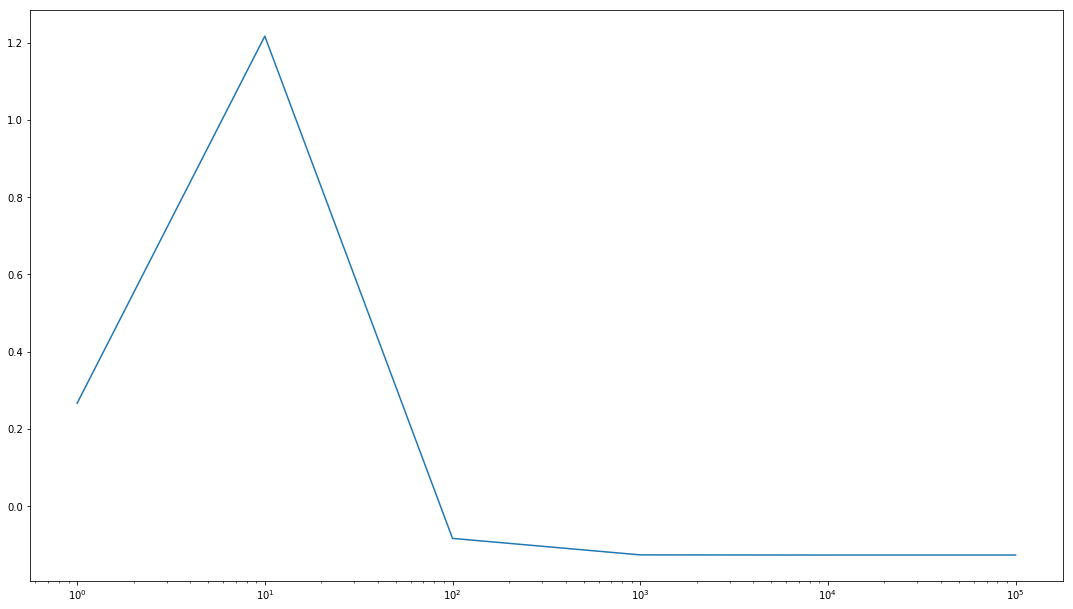

In [18]:
ph = 1
phi = 1
x1 = 1
x2 = 1
x3 = 1
r = 1
rho = 0.2
maxtheta = 1000000

dx1 = lambda theta: -x1 + np.cos(theta)*(r - rho*np.sin(phi)) + (ph*rho*np.cos(phi)*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
dx2 = lambda theta: -x2 - (ph*rho*np.cos(phi)*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2) + (r - rho*np.sin(phi))*np.sin(theta)
dx3 = lambda theta: (ph*theta)/(2.*np.pi) - x3 + (2*np.pi*r*rho*np.cos(phi))/np.sqrt(ph**2 + 4*np.pi**2*r**2)
ds = lambda theta: np.sqrt(dx1(theta)**2 + dx2(theta)**2 + dx3(theta)**2)
invds = lambda theta: 1 / ds(theta)
invds2 = lambda theta: (dx1(theta) * dx3(theta)) / ds(theta) ** 3

n_int = np.int(np.log10(np.float64(maxtheta)))
int_upp = 10**np.arange(np.float64(n_int))
int_invds = np.zeros(n_int)
int_invds_err = np.zeros(n_int)
int_invds2 = np.zeros(n_int)
int_invds2_err = np.zeros(n_int)
for i0, tint_upp in enumerate(int_upp):
#     int_invds[i0], int_invds_err[i0] = integrate.quad(invds, 0, tint_upp, limit=500000, maxp1=500000, limlst=500000)
#     print('%e' % tint_upp, int_invds[i0], int_invds_err[i0])
    int_invds2[i0], int_invds2_err[i0] = integrate.quad(invds2, -tint_upp, tint_upp, limit=500000, maxp1=500000, limlst=500000)
    print('%e' % tint_upp, int_invds2[i0], int_invds2_err[i0])
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.patch.set_facecolor('white')
# ax.semilogx(int_upp, int_invds)
ax.semilogx(int_upp, int_invds2)

# int_upp = 10*2*np.pi
# print('%e' % int_upp, integrate.quad(invds, 0, np.float64(int_upp), limit=50000, maxp1=50000, limlst=50000))
# print('%e' % int_upp, integrate.quad(invds2, 0, np.float64(int_upp), limit=50000, maxp1=50000, limlst=50000))


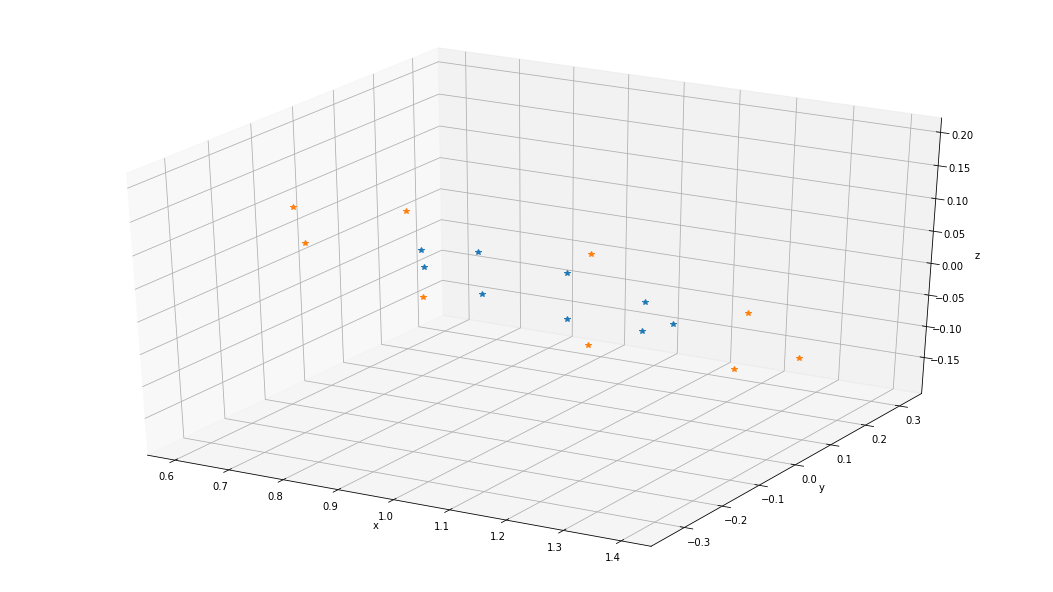

In [95]:
ph = 10   # helix pitch
r = 1    # helix radius
frho = 0.2    # helix minor radius for force nodes 
urho = 0.4    # helix minor radius for velocity nodes
n_node = 9    # number of nodes
theta = 0    # location of node plane

# rotation matrix x_global = R3*x_local
R3 = np.array((((-2*np.pi*r*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2),(ph*np.sin(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2),-np.cos(theta)),((2*np.pi*r*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2),-((ph*np.cos(theta))/np.sqrt(ph**2 + 4*np.pi**2*r**2)),-np.sin(theta)),(ph/np.sqrt(ph**2 + 4*np.pi**2*r**2),(2*np.pi*r)/np.sqrt(ph**2 + 4*np.pi**2*r**2),0)))
phi = np.linspace(0, 2*np.pi, n_node, endpoint=False)
helix_center = np.array((r*np.cos(theta), r*np.sin(theta), ph/(2*np.pi)*theta)).reshape((-1, 1))
fnodes = np.zeros((3, n_node))
fnodes[1] = frho * np.cos(phi)
fnodes[2] = frho * np.sin(phi)
fnodes = np.dot(R3, fnodes) + helix_center
unodes = np.zeros((3, n_node))
unodes[1] = urho * np.cos(phi)
unodes[2] = urho * np.sin(phi)
unodes = np.dot(R3, unodes) + helix_center

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')
ax.plot(*fnodes, '*')
ax.plot(*unodes, '*')
# ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
def InfHelixGreenFun():
    # fnodes, unodes: node coordinates of force and velocity, without check, make sure correct. 
    # frho, urho, minor radius of helix, 
    # r, major radius of helix; ph, helix pitch, 
    # maxtheta, upper limit of integration. 
    
    phi = 1
    maxtheta = 100000
    